# Score Distribution

In [116]:
import pandas as pd
import statistics #calculate mean and others
import matplotlib.pyplot as plt
from scipy import stats

In [121]:
abstracts_score = pd.read_csv(r'/home/zz3hs/git/dspg21RnD/data/dspg21RnD/abstracts_embedding_score_all.csv')   
abstracts = pd.read_pickle("/home/zz3hs/git/dspg21RnD/data/dspg21RnD/smaller-final-dataset.pkl")  #use Python 3.8 environment
oecd_ai = pd.read_csv(r'/home/zz3hs/git/dspg21RnD/data/dspg21RnD/nterm_matched_ai_abstracts.csv')   



In [131]:
abstracts_score_cb = abstracts.merge(abstracts_score, left_on = "original index", right_on = "original index")
abstracts_all = abstracts_score_cb.merge(oecd_ai, left_on = "original index", right_on = "original index", how = "left")
abstracts_all

,original index,PROJECT_ID_x,ABSTRACT_x,FY_x,ORG_COUNT_x,PI_COUNT_x,nchar_x,final_frqwds_removed_x,PROJECT_TERMS_x,PROJECT_TITLE_x,...,ORGANIZATION_COUNTRY_y,BUDGET_START_DATE_y,BUDGET_END_DATE_y,CFDA_CODE_y,FY.y_y,FY_TOTAL_COST_y,FY_TOTAL_COST_SUB_PROJECTS_y,IS_AI_1,IS_AI_2,IS_AI
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,1,1,1402,"[multiprotein, y_secretase, proteolytically_cl...",Active Sites; Affect; Alzheimer's Disease; Am...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,1,1,2553,"[kissl, gene, encode, peptide, kisspeptin, bin...",Affect; Animal Model; Axon; Behavior; Behavio...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,1,1,1414,"[biophysical, basis, thermodynamics_kinetic, m...",Agreement; Antibodies; base; Binding; Biochem...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,1,1,1545,"[obesity, adverse_pregnancyoutcome, great, hea...",African; Analysis of Variance; Asians; Birth;...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,371628,594482,Local potato advisory groups have expressed in...,2010,1,1,271,"[local, potato, advisory, express, interest, m...",cost; Health; interest; Manure; Parasitic nem...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690768,1034758,1126666,Project Summary/AbstractThe pathophysiology of...,2019,1,1,2836,"[pathophysiology, schizophrenia, advance, thed...",Adolescence; Adult; Adult Children; Affect; A...,GUT DYSBIOSIS AND 5-HT2A DYSREGULATION IN A PR...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690769,1074034,1109788,PROJECT SUMMARY:Alzheimer’s Disease (AD) and A...,2019,1,1,2899,"[alzheimer, ad, amyotrophic_lateral_sclerosis_...",abeta deposition; Acetylgalactosamine; Affect...,TISSUE-SPECIFIC MODULATION OF APOLIPOPROTEIN E...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690770,1029450,1038442,"Project SummaryThe highest rates of mortality,...",2018,1,1,2186,"[highest, mortality, acute, care, encounter, r...",Acute; Address; Adherence; Adolescent; Adoles...,THE FEASIBILITY OF A MEDICAL STUDENT MENTORING...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690771,1074409,1154490,PROJECT SUMMARY: Treatment paradigms for kidne...,2019,1,1,3056,"[paradigm, kidney, largely, stagnant, decade, ...",3-Dimensional; Acute; Acute Renal Failure wit...,STRATEGIES IN RENAL NANOMEDICINE TO IMPACT TRE...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
sentence_score_ls = abstracts_all["sentence_score"]

sentence_score_ls_float = []
for sentence_score in sentence_score_ls:
    sentence_score = str(sentence_score)[1:-1]
    sentence_score = sentence_score.split(",")
    item_float= []
    for item in sentence_score:
        item_float.append(float(item))
    sentence_score_ls_float.append(item_float)

    
abstracts_all["sentence_score_float"] = sentence_score_ls_float

In [133]:
sentence_score_ls = abstracts_all["sentence_score_float"]

abstract_score= []
num_sentences = []
diff_sentence_score = []
max_sentence_score = []
for sentence_score in sentence_score_ls:
    abstract_score.append(statistics.mean(sentence_score))
    num_sentences.append(len(sentence_score))
    diff_sentence_score.append(max(sentence_score)- min(sentence_score))
    max_sentence_score.append(max(sentence_score))

abstracts_all["abstract_score"]=abstract_score
abstracts_all["num_sentences"]=num_sentences
abstracts_all["diff_sentence_score"]=diff_sentence_score
abstracts_all["max_sentence_score"]=max_sentence_score

In [134]:
abstracts_all = abstracts_all.assign(IS_AI = lambda x: x.IS_AI.notnull())
abstracts_all = abstracts_all.assign(IS_AI_1 = lambda x: x.IS_AI_1.notnull())
abstracts_all = abstracts_all.assign(IS_AI_2 = lambda x: x.IS_AI_2.notnull())

In [135]:
abstracts_all

,original index,PROJECT_ID_x,ABSTRACT_x,FY_x,ORG_COUNT_x,PI_COUNT_x,nchar_x,final_frqwds_removed_x,PROJECT_TERMS_x,PROJECT_TITLE_x,...,FY_TOTAL_COST_y,FY_TOTAL_COST_SUB_PROJECTS_y,IS_AI_1,IS_AI_2,IS_AI,sentence_score_float,abstract_score,num_sentences,diff_sentence_score,max_sentence_score
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,1,1,1402,"[multiprotein, y_secretase, proteolytically_cl...",Active Sites; Affect; Alzheimer's Disease; Am...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,...,NaN,NaN,False,False,False,"[0.26852233409881593, 0.23507945835590363, 0.2...",0.282744,10,0.132267,0.341430
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,1,1,2553,"[kissl, gene, encode, peptide, kisspeptin, bin...",Affect; Animal Model; Axon; Behavior; Behavio...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,...,NaN,NaN,False,False,False,"[0.20771720111370087, 0.19797645509243011, 0.2...",0.266751,13,0.137261,0.335238
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,1,1,1414,"[biophysical, basis, thermodynamics_kinetic, m...",Agreement; Antibodies; base; Binding; Biochem...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,...,NaN,NaN,False,False,False,"[0.4141664981842041, 0.39060362577438357, 0.30...",0.364360,9,0.161700,0.414166
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,1,1,1545,"[obesity, adverse_pregnancyoutcome, great, hea...",African; Analysis of Variance; Asians; Birth;...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,...,NaN,NaN,False,False,False,"[0.2504270672798157, 0.23719413280487062, 0.22...",0.282069,8,0.166646,0.390435
4,371628,594482,Local potato advisory groups have expressed in...,2010,1,1,271,"[local, potato, advisory, express, interest, m...",cost; Health; interest; Manure; Parasitic nem...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,...,NaN,NaN,False,False,False,"[0.3460001289844513, 0.2590913474559784, 0.275...",0.293372,3,0.086909,0.346000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690768,1034758,1126666,Project Summary/AbstractThe pathophysiology of...,2019,1,1,2836,"[pathophysiology, schizophrenia, advance, thed...",Adolescence; Adult; Adult Children; Affect; A...,GUT DYSBIOSIS AND 5-HT2A DYSREGULATION IN A PR...,...,NaN,NaN,False,False,False,"[0.34958806037902834, 0.32903844118118286, 0.2...",0.348574,9,0.240447,0.480256
690769,1074034,1109788,PROJECT SUMMARY:Alzheimer’s Disease (AD) and A...,2019,1,1,2899,"[alzheimer, ad, amyotrophic_lateral_sclerosis_...",abeta deposition; Acetylgalactosamine; Affect...,TISSUE-SPECIFIC MODULATION OF APOLIPOPROTEIN E...,...,NaN,NaN,False,False,False,"[0.38217119574546815, 0.3103180766105652, 0.37...",0.334160,17,0.177698,0.406676
690770,1029450,1038442,"Project SummaryThe highest rates of mortality,...",2018,1,1,2186,"[highest, mortality, acute, care, encounter, r...",Acute; Address; Adherence; Adolescent; Adoles...,THE FEASIBILITY OF A MEDICAL STUDENT MENTORING...,...,NaN,NaN,False,False,False,"[0.24335776567459105, 0.3173358976840973, 0.37...",0.338396,10,0.130270,0.373628
690771,1074409,1154490,PROJECT SUMMARY: Treatment paradigms for kidne...,2019,1,1,3056,"[paradigm, kidney, largely, stagnant, decade, ...",3-Dimensional; Acute; Acute Renal Failure wit...,STRATEGIES IN RENAL NANOMEDICINE TO IMPACT TRE...,...,NaN,NaN,False,False,False,"[0.3262500762939453, 0.297983318567276, 0.3158...",0.331536,13,0.198656,0.422745


## Distribution of number of sentences per abstract

count    690773.000000
mean         13.033040
std           6.867704
min           1.000000
25%           9.000000
50%          12.000000
75%          16.000000
max         318.000000
Name: num_sentences, dtype: float64


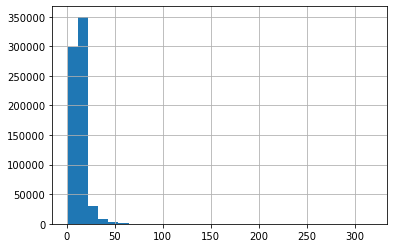

In [77]:
hist = abstracts_all.num_sentences.hist(bins=30)
print(abstracts_all.num_sentences.describe())

## Abstract score distribution

### All abstract: mean sentence score vs max sentence score

count    690773.000000
mean          0.323253
std           0.049879
min           0.103624
25%           0.286695
50%           0.319637
75%           0.355989
max           0.598595
Name: abstract_score, dtype: float64
count    690773.000000
mean          0.414810
std           0.056915
min           0.103624
25%           0.376652
50%           0.416743
75%           0.453491
max           0.742250
Name: max_sentence_score, dtype: float64


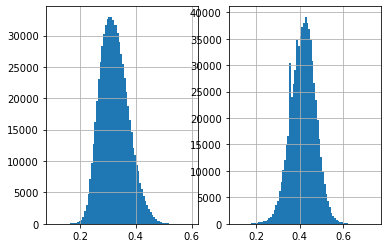

In [137]:
#Distribution of abstract average score
fig, axes = plt.subplots(1, 2)
abstracts_all.abstract_score.hist(bins=80,ax=axes[0])
abstracts_all.max_sentence_score.hist(bins=80, ax=axes[1])


print(abstracts_all.abstract_score.describe())
print(abstracts_all.max_sentence_score.describe())

### Comparing the mean embedding score between AI and Not AI abstracts

count    685026.000000
mean          0.322638
std           0.049387
min           0.103624
25%           0.286429
50%           0.319182
75%           0.355236
max           0.576885
Name: abstract_score, dtype: float64
count    5747.000000
mean        0.396509
std         0.053853
min         0.226006
25%         0.360125
50%         0.397542
75%         0.434653
max         0.598595
Name: abstract_score, dtype: float64


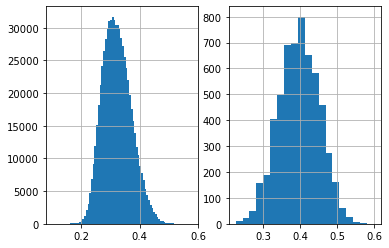

In [107]:
#Distribution of abstract average score
abstracts_not_ai = abstracts_all[abstracts_all["IS_AI"] == False]
abstracts_ai = abstracts_all[abstracts_all["IS_AI"] == True]

fig, axes = plt.subplots(1, 2)
abstracts_not_ai.abstract_score.hist(bins=80,ax=axes[0])
abstracts_ai.abstract_score.hist(bins=20, ax=axes[1])


print(abstracts_not_ai.abstract_score.describe())
print(abstracts_ai.abstract_score.describe())

In [119]:
abstracts_not_ai = abstracts_all.query('IS_AI == False')['abstract_score']
abstracts_ai = abstracts_all.query('IS_AI == True')['abstract_score']

res = stats.ttest_ind(abstracts_ai, abstracts_not_ai, equal_var=True)

display(res)

Ttest_indResult(statistic=112.82893067496268, pvalue=0.0)

### Comparing the max embedding score between AI and Not AI abstracts

count    685026.000000
mean          0.414147
std           0.056444
min           0.103624
25%           0.376292
50%           0.416214
75%           0.452760
max           0.742250
Name: max_sentence_score, dtype: float64
count    5747.000000
mean        0.493850
std         0.057580
min         0.285862
25%         0.455825
50%         0.493521
75%         0.533481
max         0.695260
Name: max_sentence_score, dtype: float64


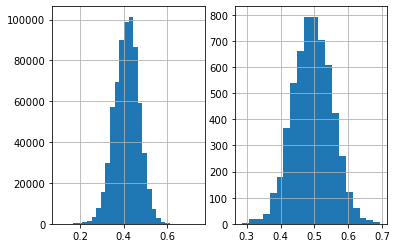

In [140]:
#Distribution of abstract average score
abstracts_not_ai = abstracts_all[abstracts_all["IS_AI"] == False]
abstracts_ai = abstracts_all[abstracts_all["IS_AI"] == True]

fig, axes = plt.subplots(1, 2)
abstracts_not_ai.max_sentence_score.hist(bins=30,ax=axes[0])
abstracts_ai.max_sentence_score.hist(bins=20, ax=axes[1])


print(abstracts_not_ai.max_sentence_score.describe())
print(abstracts_ai.max_sentence_score.describe())

### Distribution of the difference between max and min sentence score per abstract 

count    690773.000000
mean          0.175742
std           0.062373
min           0.000000
25%           0.136448
50%           0.175998
75%           0.217013
max           0.506595
Name: diff_sentence_score, dtype: float64


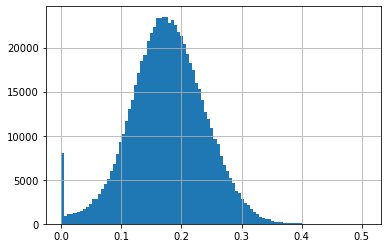

In [81]:
hist = abstracts_all.diff_sentence_score.hist(bins=100)
print(abstracts_all.diff_sentence_score.describe())